In [1]:
import pandas as pd
import pyarrow as py
import numpy as np
print (np.__version__)
print(pd.__version__)
print(py.__version__)

1.19.5
1.3.3
5.0.0


In [99]:
parquet_file1 = "../basic-market-cva/outputs/0f7d1509-1996-400d-b086-98ac43989a86/runs/root__system__Agents__PricingDesk/run000.parquet"
parquet_file2 = "../basic-market-cva/outputs/8dce2a88-21b5-4644-b290-86c068103229/runs/root__system__Agents__PricingDesk/run000.parquet"
parquet_file3 = "../basic-market-cva/outputs/4388fb36-b80f-42f6-aa1a-c48dbda20de4/runs/root__system__Agents__PricingDesk/run000.parquet"

none_file = "../basic-market-cva/outputs/4a81ab0a-69d8-46f1-8483-09efcc45f2b1/runs/root__system__Agents__PricingDesk/run000.parquet"
delta_file = "../basic-market-cva/outputs/5f6f5bb9-cd12-4153-a3fa-855ee70778ba/runs/root__system__Agents__PricingDesk/run000.parquet"
delta_file = "../basic-market-cva/outputs/e0c5a193-56b8-4d86-830f-3270e3aa9e10/runs/root__system__Agents__PricingDesk/run000.parquet"

In [4]:
tempdf = pd.read_parquet(parquet_file1, engine='pyarrow')
data = tempdf.to_numpy().flatten().tolist()
df = pd.DataFrame(data)
pd.DataFrame(data)


,cvaPercent,numberOfAssets,price,totalMoney,totalValue,valueAtRisk,_id,seed,tick
0,0.0,100.0,9.9,0.0,0.0,0.0,6,83913035857800,0
1,0.1987007234000945,100.0,9.925,0.0,0.5200000000000073,4.036973374190062,6,83913035857800,1
2,0.2629233301148964,100.0,9.975000000000001,0.0,2.489604236980851,5.478041242456056,6,83913035857800,2
3,0.2161407401437984,100.0,10.05,0.0,5.938041622745348,3.976937050651136,6,83913035857800,3
4,0.20792951507619814,100.0,10.05,0.0,7.5173051116161576,4.295031870800399,6,83913035857800,4
...,...,...,...,...,...,...,...,...,...
96,0.41099805520936644,109.0,9.774999999999995,-30.881541320388315,2.9233484612209306,18.776013807384643,6,83913035857800,96
97,0.46504414819571577,110.0,9.799999999999995,-40.731299329134515,0.5933794040521834,17.009846922987947,6,83913035857800,97
98,0.4657808794053464,110.0,9.774999999999995,-40.631299329134514,4.188764050589194,16.374257718946392,6,83913035857800,98
99,0.538027833953376,113.0,9.799999999999995,-70.08956819154693,1.4762304212852717,16.226856628747072,6,83913035857800,99


In [5]:
df=df.astype(float)
df.plot(x ='tick', y='valueAtRisk', kind = 'line')

In [6]:
def get_dataframe(file):
    tempdf = pd.read_parquet(file, engine='pyarrow')
    return pd.DataFrame(tempdf.to_numpy().flatten().tolist())

In [63]:
def plot_df_list_var(dfList):
    dfList[0]['tick']=pd.to_numeric(dfList[0]['tick'])
    dfList[0]['valueAtRisk']=pd.to_numeric(dfList[0]['valueAtRisk'])
    ax = dfList[0].plot(x ='tick', y='valueAtRisk', kind = 'line')
    for i in range(1,len(dfList)):
        dfList[i]['tick']=pd.to_numeric(dfList[i]['tick'])
        dfList[i]['valueAtRisk']=pd.to_numeric(dfList[i]['valueAtRisk'])
        dfList[i].plot(x ='tick', y='valueAtRisk', kind = 'line',ax=ax)

In [65]:
def plot_df_list_money(dfList):
    dfList[0]['tick']=pd.to_numeric(dfList[0]['tick'])
    dfList[0]['totalMoney']=pd.to_numeric(dfList[0]['totalMoney'])
    ax = dfList[0].plot(x ='tick', y='totalMoney', kind = 'line')
    for i in range(1,len(dfList)):
        dfList[i]['tick']=pd.to_numeric(dfList[i]['tick'])
        dfList[i]['totalMoney']=pd.to_numeric(dfList[i]['totalMoney'])
        dfList[i].plot(x ='tick', y='totalMoney', kind = 'line',ax=ax)

               cvaPercent numberOfAssets              price  \
0                     0.0          100.0                9.9   
1                     0.0          100.0  9.950000000000001   
2    0.051847570778572584          100.0                9.9   
3     0.17930895748140266          100.0              9.875   
4     0.15253170062725124          100.0                9.9   
..                    ...            ...                ...   
96    0.24745352031567028           96.0  9.474999999999996   
97      0.147319009395886           99.0  9.524999999999997   
98    0.21168947513468836           97.0  9.549999999999997   
99    0.32245279768118246           98.0  9.549999999999997   
100    0.4409218835904311           96.0  9.524999999999997   

             totalMoney           totalValue         valueAtRisk _id tick  \
0                 200.0                  0.0                 0.0   6    0   
1                 200.0                  0.0                 0.0   6    1   
2           

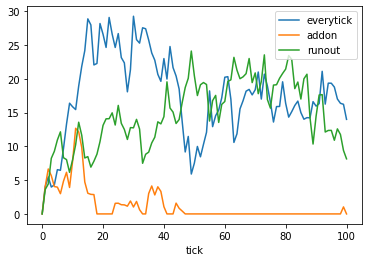

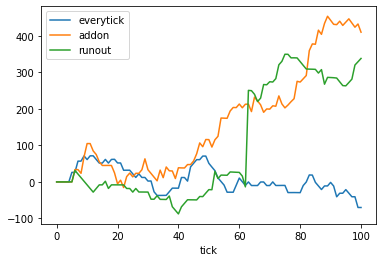

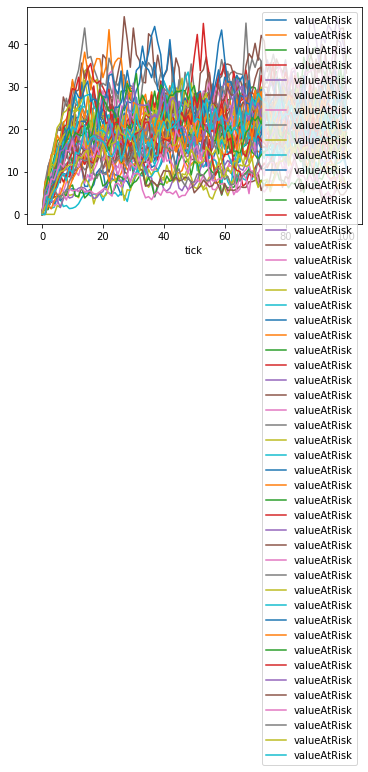

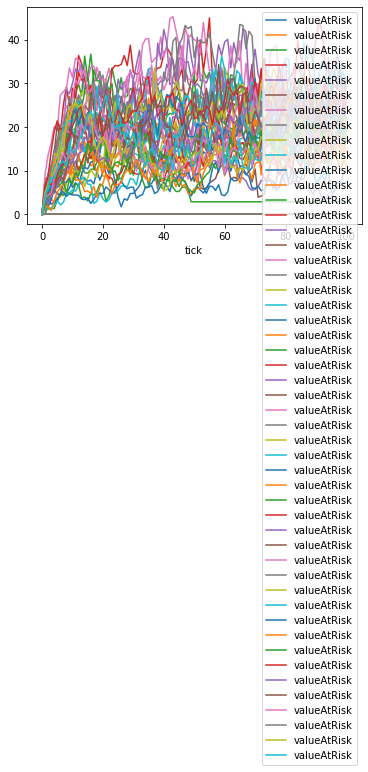

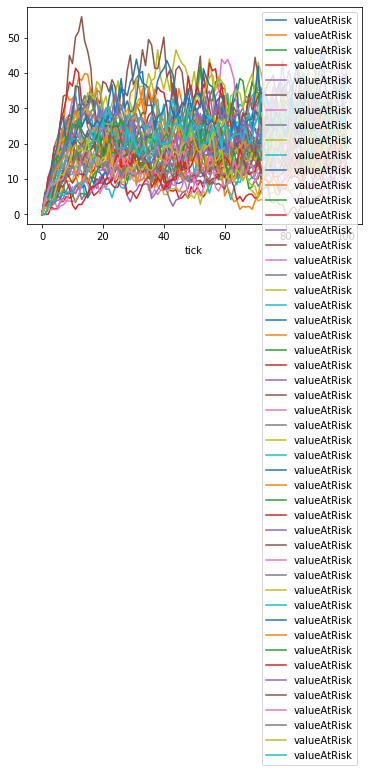

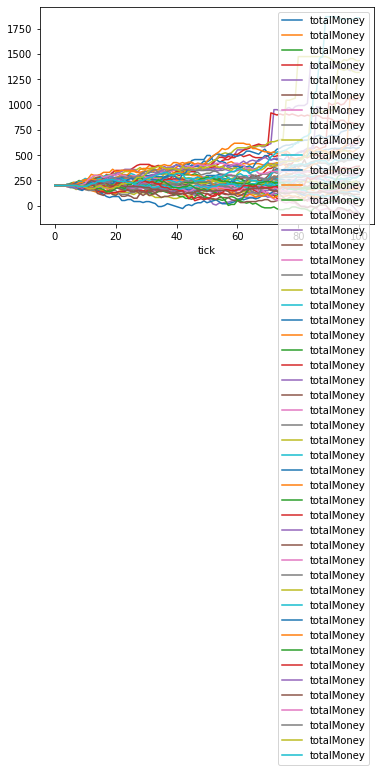

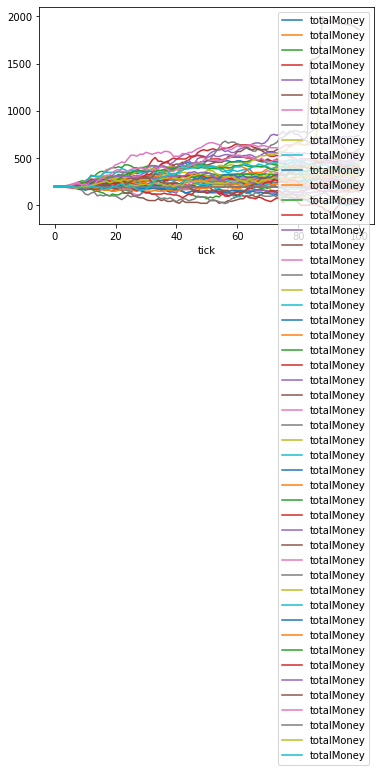

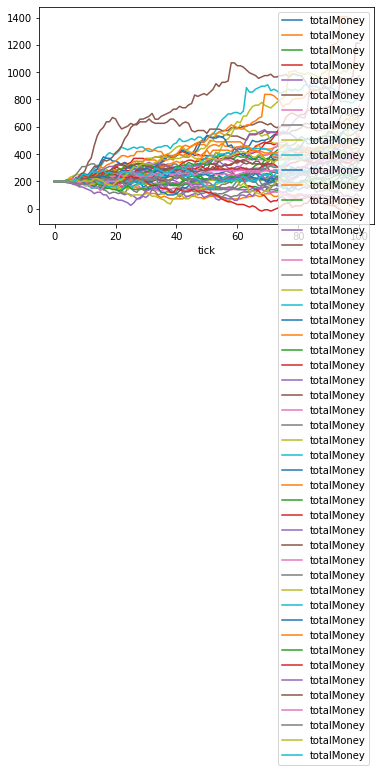

In [81]:
every_list = [get_dataframe(f"../basic-market-cva/outputs/0b69ee70-7d94-4caf-8e03-7bf9236fbed3/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]
addon_list = [get_dataframe(f"../basic-market-cva/outputs/2c1aeaa7-0bc2-407b-b73e-281e79878af6/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]
runout_list = [get_dataframe(f"../basic-market-cva/outputs/51480120-3184-4424-8fe3-e5a55ebcd0c5/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]


df1 = get_dataframe(parquet_file1).astype(float)
df2 = get_dataframe(parquet_file2).astype(float)
df3 = get_dataframe(parquet_file3).astype(float)

df1.info()

ax1=df1.plot(x ='tick', y='valueAtRisk', label='everytick', kind = 'line')
df2.plot(x ='tick', y='valueAtRisk',label='addon',ax=ax1)
df3.plot(x ='tick', y='valueAtRisk',label='runout',ax=ax1)

ax2=df1.plot(x ='tick', y='totalMoney', label='everytick', kind = 'line')
df2.plot(x ='tick', y='totalMoney',label='addon',ax=ax2)
df3.plot(x ='tick', y='totalMoney',label='runout',ax=ax2)

plot_df_list_var(every_list)
plot_df_list_var(addon_list)
plot_df_list_var(runout_list)

plot_df_list_money(every_list)
plot_df_list_money(addon_list)
plot_df_list_money(runout_list)



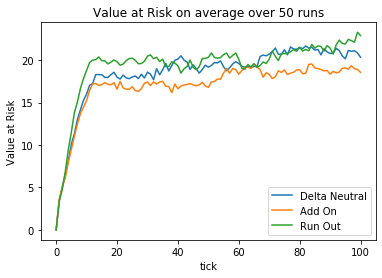

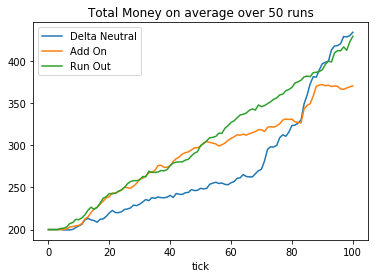

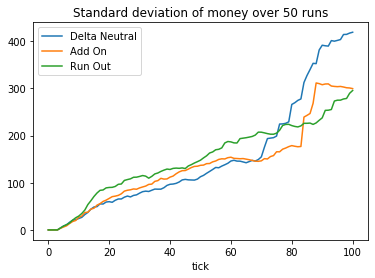

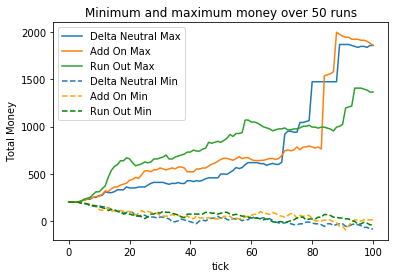

In [115]:
df1 = pd.concat(every_list)
df2 = pd.concat(addon_list)
df3 = pd.concat(runout_list)
ax = df1.groupby('tick').mean().plot(y='valueAtRisk',label='Delta Neutral',kind = 'line',title='Value at Risk on average over 50 runs')
df2.groupby('tick').mean().plot(y='valueAtRisk',kind = 'line',ax=ax,label='Add On')
df3.groupby('tick').mean().plot(y='valueAtRisk',kind = 'line',ax=ax,label='Run Out')

ax.set_ylabel("Value at Risk")

ax.get_figure().savefig('varmean.png')
ax = df1.groupby('tick').mean().plot(y='totalMoney',label='Delta Neutral',kind = 'line',title='Total Money on average over 50 runs')
df2.groupby('tick').mean().plot(y='totalMoney',kind = 'line',ax=ax,label='Add On')
df3.groupby('tick').mean().plot(y='totalMoney',kind = 'line',ax=ax,label='Run Out')

ax.get_figure().savefig('moneymean.png')

ax = df1.groupby('tick').std().plot(y='totalMoney',label='Delta Neutral',kind = 'line',title='Standard deviation of money over 50 runs')
df2.groupby('tick').std().plot(y='totalMoney',kind = 'line',ax=ax,label='Add On')
df3.groupby('tick').std().plot(y='totalMoney',kind = 'line',ax=ax,label='Run Out')
ax.get_figure().savefig('moneystd.png')

ax = df1.groupby('tick').max().plot(y='totalMoney',label='Delta Neutral Max',kind = 'line',title='Minimum and maximum money over 50 runs')
df2.groupby('tick').max().plot(y='totalMoney',kind = 'line',ax=ax,label='Add On Max')
df3.groupby('tick').max().plot(y='totalMoney',kind = 'line',ax=ax,label='Run Out Max')
df1.groupby('tick').min().plot(y='totalMoney',label='Delta Neutral Min',kind = 'line', ax = ax,color = "tab:blue", style = "--")
df2.groupby('tick').min().plot(y='totalMoney',kind = 'line',ax=ax,label='Add On Min',color="orange", style = "--")
df3.groupby('tick').min().plot(y='totalMoney',kind = 'line',ax=ax,label='Run Out Min',color="green", style = "--")
ax.set_ylabel("Total Money")

ax.get_figure().savefig('moneyminmax.png')
df1group = df1.groupby('tick')
#ax = df1.loc[df1group['tick'] == 100].plot(y='totalMoney',label='Delta Neutral',kind = 'line',title='Minimum and maximum money over 50 runs')





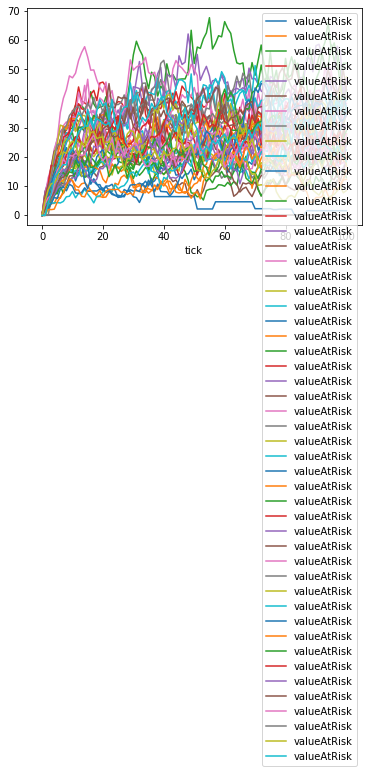

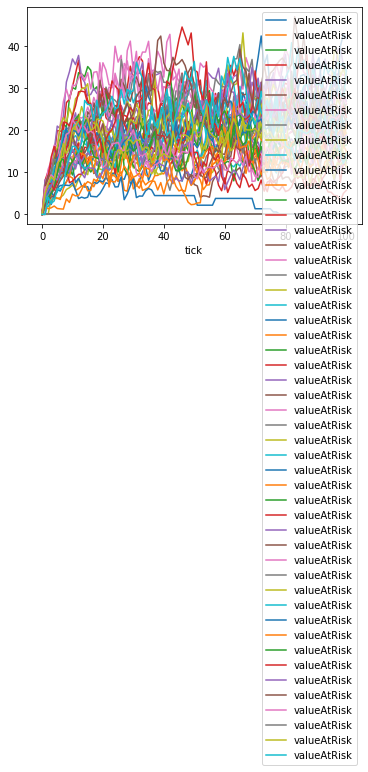

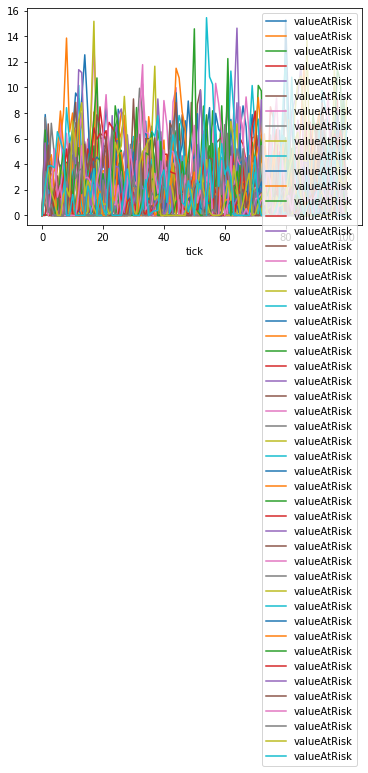

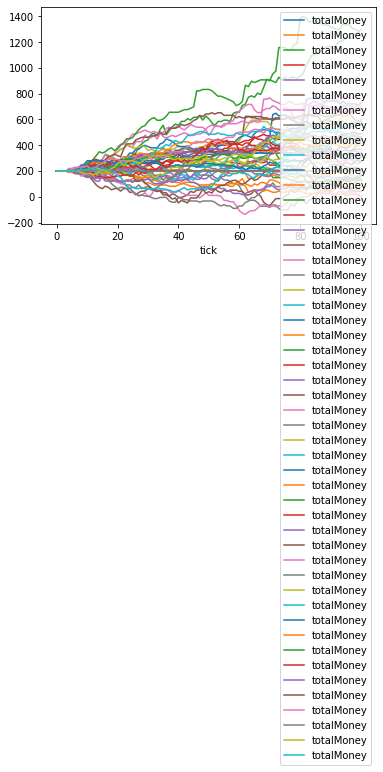

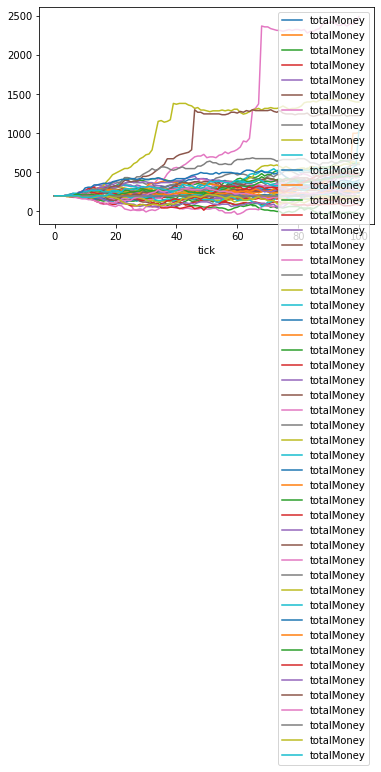

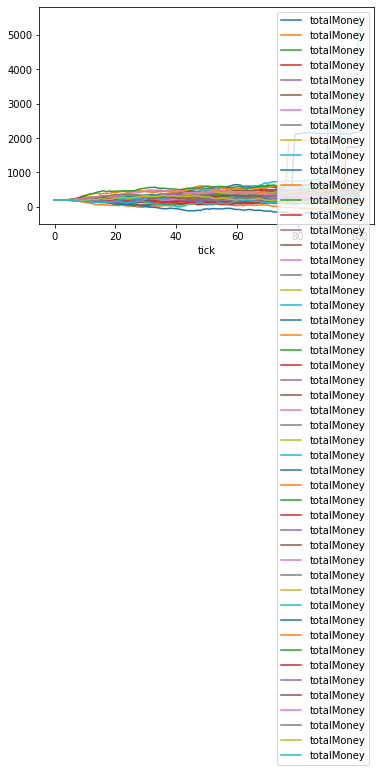

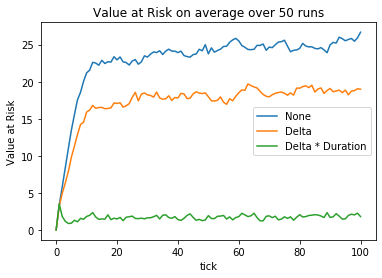

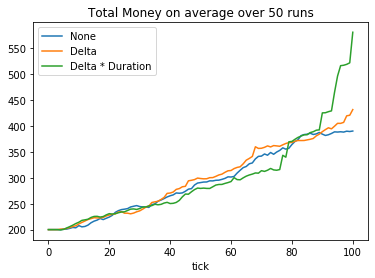

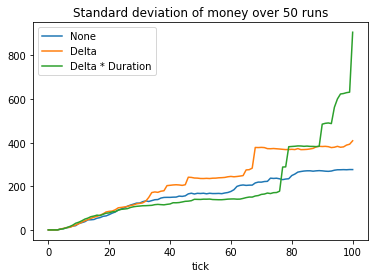

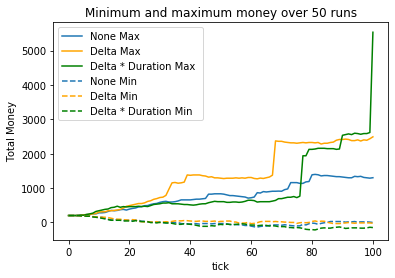

In [124]:
none_list = [get_dataframe(f"../basic-market-cva/outputs/4a81ab0a-69d8-46f1-8483-09efcc45f2b1/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]
delta_list = [get_dataframe(f"../basic-market-cva/outputs/5f6f5bb9-cd12-4153-a3fa-855ee70778ba/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]
total_list = [get_dataframe(f"../basic-market-cva/outputs/e0c5a193-56b8-4d86-830f-3270e3aa9e10/runs/Simulation_Agent_PricingDesk/run0000000{str(i).zfill(2)}.parquet") for i in range(0,50)]

plot_df_list_var(none_list)
plot_df_list_var(delta_list)
plot_df_list_var(total_list)

plot_df_list_money(none_list)
plot_df_list_money(delta_list)
plot_df_list_money(total_list)

df1 = pd.concat(none_list)
df2 = pd.concat(delta_list)
df3 = pd.concat(total_list)
ax = df1.groupby('tick').mean().plot(y='valueAtRisk',label='None',kind = 'line',title='Value at Risk on average over 50 runs')
df2.groupby('tick').mean().plot(y='valueAtRisk',kind = 'line',ax=ax,label='Delta')
df3.groupby('tick').mean().plot(y='valueAtRisk',kind = 'line',ax=ax,label='Delta * Duration')

ax.set_ylabel("Value at Risk")

ax.get_figure().savefig('varmeanamounts.png')
ax = df1.groupby('tick').mean().plot(y='totalMoney',label='None',kind = 'line',title='Total Money on average over 50 runs')
df2.groupby('tick').mean().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta')
df3.groupby('tick').mean().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta * Duration')
ax.get_figure().savefig('moneymeanamounts.png')

ax = df1.groupby('tick').std().plot(y='totalMoney',label='None',kind = 'line',title='Standard deviation of money over 50 runs')
df2.groupby('tick').std().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta')
df3.groupby('tick').std().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta * Duration')
ax.get_figure().savefig('moneystdamounts.png')

ax = df1.groupby('tick').max().plot(y='totalMoney',label='None Max',kind = 'line',title='Minimum and maximum money over 50 runs', color = "tab:blue")
df2.groupby('tick').max().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta Max', color = "orange")
df3.groupby('tick').max().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta * Duration Max ', color = "green")
df1.groupby('tick').min().plot(y='totalMoney',label='None Min',kind = 'line', ax = ax, color = "tab:blue", style = "--")
df2.groupby('tick').min().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta Min', color="orange", style = "--")
df3.groupby('tick').min().plot(y='totalMoney',kind = 'line',ax=ax,label='Delta * Duration Min',color="green", style = "--")
ax.set_ylabel("Total Money")
ax.get_figure().savefig('moneyminmaxamounts.png')